### Importing packages:

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp 
import seaborn as sb
import math
import random
import scipy as sp
from scipy.integrate import quad

-------------------------------------------------------------------------------------------------------------------------------

### Choosing non-linear function and defining its formula: 

In [3]:
def f(x):
    return ((1)/(x**3+1))
f2 = np.vectorize(f) #I vectorize function in case it's trigonometrical, for example sinus or cosinus

-------------------------------------------------------------------------------------------------------------------------------

### Creating function that generates random number in range [1,25]:

In [4]:
def random_number_generator():
    return random.randint(1, 26)

-------------------------------------------------------------------------------------------------------------------------------

### Generating random integer number in range [1,25]:

In [5]:
interval_number = random_number_generator()

-------------------------------------------------------------------------------------------------------------------------------

### Finding length of a interval:

In [6]:
gap = 5 / interval_number

-------------------------------------------------------------------------------------------------------------------------------

### Finding x arguments and its values at the start and end of the interval: 

#### Start arguments and values: 

In [7]:
x_bar_start = np.arange(0, 5 , gap)

In [8]:
def values(arguments, function):
    '''Function that returns table of values when table of arguments and support function are given'''
    values_table = []
    for x in arguments:
        values_table.append(function(x))
    return values_table

In [9]:
y_bar_start = values(x_bar_start, f)

#### End arguments and values:

In [10]:
x_bar_end = [x + gap for x in x_bar_start]
y_bar_end = values(x_bar_end, f)

-------------------------------------------------------------------------------------------------------------------------------

### Computing integral:

In [11]:
res, err = quad(f, 0, 5)

-------------------------------------------------------------------------------------------------------------------------------

### Creating function that returns area of the rectangles:

In [12]:
def area_counter(a, b):
    sum_area = 0
    for i in b:
        sum_area += (a * i)
    return sum_area

#### Sum 1

In [13]:
sum1 = area_counter(gap, y_bar_start)
print(sum1)

1.3269699111987814


#### Sum 2

In [14]:
sum2 = area_counter(gap, y_bar_end)
print(sum2)

1.0513967189589228


-------------------------------------------------------------------------------------------------------------------------------

### Auxiliary data :

In [18]:
add_data = (interval_number, res)
main_title = 'Number of intervals: {} \n Area \u2248 {:.3f}'.format(*add_data)
sub1 = 'Sum I \u2248 {:.3f}'.format(sum1)
sub3 = 'Sum II \u2248 {:.3f}'.format(sum2)

------------------------------------------------------------------------------------------------------------------------------

### Creating subplots with the same range on OX: 

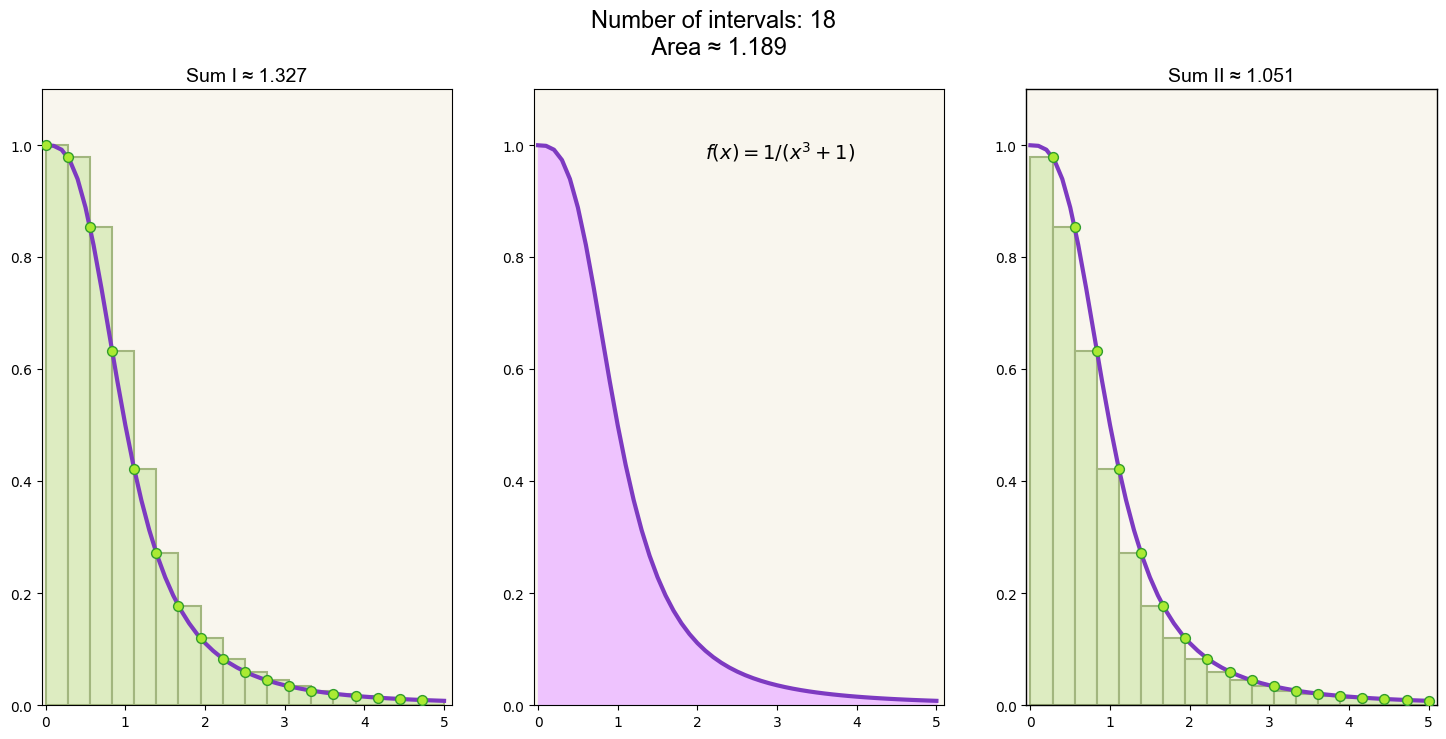

In [19]:
x = np.arange(0, 5.1, 0.1)  # Defining domain and set of values
y = f2(x)



fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, sharex=True, # Creating subplots and defining figsize:
                                    figsize=(18, 8))




plt.rcParams['axes.xmargin'] = 0  #Setting margins on 0, so there is no gap at the start of OX:





#SUBPLOT 1:
ax0.set_title(sub1, fontname="Arial", fontsize = 14) #subplot title
ax0.errorbar(x, y, errorevery=6, color = "#7d3ac1", linewidth = 3) #f(x) function 
ax0.bar(x_bar_start, y_bar_start, facecolor='#DDECC1', width =gap, edgecolor = "#A2B67E", align='edge' , linewidth = 1.5)
ax0.scatter(x_bar_start, y_bar_start, zorder = 3, color = "#AAEA33", edgecolors = '#319D2C', s=50)
ax0.set_ylim([0, 1.1]) #setting limit of OY
ax0.set_xlim([-0.05, 5.1]) #setting limit of OX
ax0.set_facecolor('#F9F6EE')

for axis in ['top', 'bottom', 'left', 'right']:

    ax2.spines[axis].set_linewidth(1)



#SUBPLOT 2:
ax1.errorbar(x, y, errorevery=6, color = "#7d3ac1", linewidth = 3) #f(x) function 
ax1.fill_between(x, y, color = '#EEC3FE') #filling the area under the function with color
ax1.text(0.6, 0.9, '$f(x)=1/(x^3+1)$', horizontalalignment='center',
     verticalalignment='center', transform=ax1.transAxes, fontsize = 14)    #adding text
ax1.set_ylim([0, 1.1]) #setting limit of OY
ax1.set_xlim([-0.05, 5.1]) #setting limit of OX
ax1.set_facecolor('#F9F6EE')

for axis in ['top', 'bottom', 'left', 'right']:

    ax2.spines[axis].set_linewidth(1)




#SUBPLOT 3:
ax2.set_title(sub3, fontname="Arial", fontsize = 14) #title
ax2.errorbar(x, y, errorevery=6, color = "#7d3ac1", linewidth = 3) #f(x) function 
ax2.set_ylim([0, 1.1]) #setting limit of OY
ax2.set_xlim([-0.05, 5.1]) #setting limit of OX
ax2.bar(x_bar_start, y_bar_end, facecolor='#DDECC1', width =gap, edgecolor = "#A2B67E",align='edge', linewidth = 1.5)
ax2.scatter(x_bar_end, y_bar_end, zorder = 3, color = "#AAEA33", edgecolors = '#319D2C', s=50)
ax2.set_facecolor('#F9F6EE')


for axis in ['top', 'bottom', 'left', 'right']:

    ax2.spines[axis].set_linewidth(1)


fig.suptitle(main_title, fontsize = 17, fontname="Arial")
#plt.savefig('integrals.pdf')
plt.show()
